# Linear Regression

[Video](https://www.youtube.com/watch?v=O0HQnTJhr70)

[Book](https://www.kaggle.com/code/hamelg/python-for-data-27-linear-regression/notebook)

In [4]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as stats
matplotlib.style.use('ggplot')

In [2]:
mtcars = pd.read_csv('data/mtcars.csv')
mtcars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   mpg         32 non-null     float64
 2   cyl         32 non-null     int64  
 3   disp        32 non-null     float64
 4   hp          32 non-null     int64  
 5   drat        32 non-null     float64
 6   wt          32 non-null     float64
 7   qsec        32 non-null     float64
 8   vs          32 non-null     int64  
 9   am          32 non-null     int64  
 10  gear        32 non-null     int64  
 11  carb        32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


## Predict weight based on miles per gallon

<Axes: xlabel='wt', ylabel='mpg'>

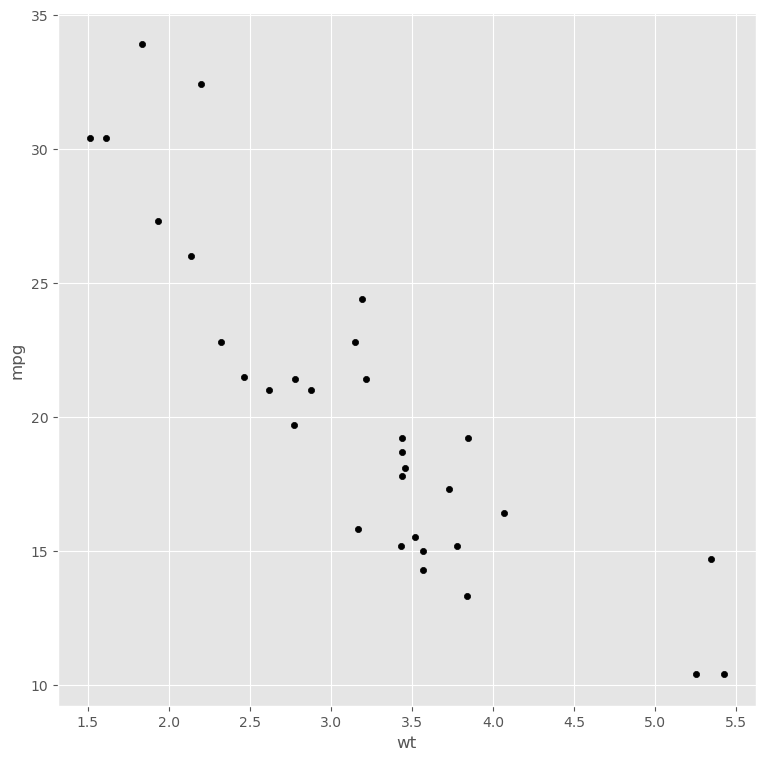

In [5]:
mtcars.plot(kind="scatter",
            x='wt',
            y='mpg',
            figsize=(9,9),
            color="black")

In [7]:
from sklearn import linear_model

1. Initialize Model
2. Train model with data
3. Check model y-intercept
4. Check trained model coefficients

In [8]:
regression_model = linear_model.LinearRegression()
regression_model.fit(X=pd.DataFrame(mtcars["wt"]),
                     y=mtcars['mpg'])
print(regression_model.intercept_)  # Miles per gallon
print(regression_model.coef_)       # Coefficient for weight variable

37.285126167342035
[-5.34447157]


This says that for every unit increase in weight, mpg decreases by factor of 5.3.

## Scoring the results - R-squared $\text{R}^2$

In [9]:
regression_model.score(X = pd.DataFrame(mtcars['wt']),
                       y=mtcars['mpg'])

0.7528327936582646

75% of the variance in car weight can be explained by the mpg variable.

To see the residuals, subtract the predictions from the actual values.

In [10]:
train_prediction = regression_model.predict(X=pd.DataFrame(mtcars['wt']))

residuals = mtcars['mpg'] - train_prediction

residuals.describe()

count    3.200000e+01
mean    -3.552714e-15
std      2.996352e+00
min     -4.543151e+00
25%     -2.364709e+00
50%     -1.251956e-01
75%      1.409561e+00
max      6.872711e+00
Name: mpg, dtype: float64

$\text{R}^2=1-\frac{SSResiduals}{SSActual}$

In [13]:
SSResiduals = ( residuals**2).sum()
SSActual = ((mtcars['mpg'] - mtcars['mpg'].mean())**2).sum()

1 - (SSResiduals / SSActual)

0.7528327936582646

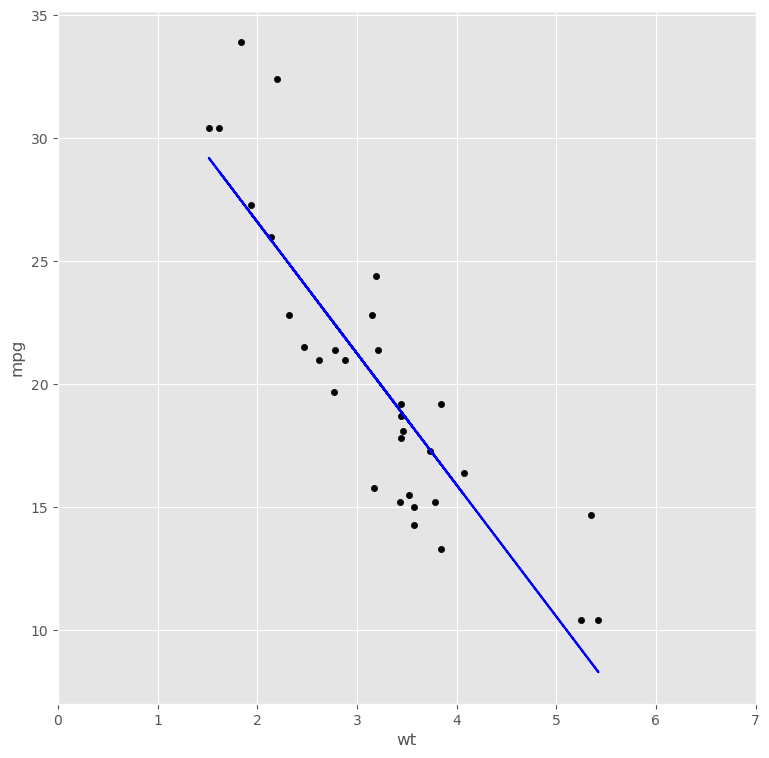

In [14]:
mtcars.plot(kind="scatter",
            x='wt',
            y='mpg',
            figsize=(9,9),
            color="black",
            xlim=(0,7))

plt.plot(mtcars['wt'],
         train_prediction,
         color='blue')

Outliers have a large effect on SSR. Here's an extreme example.

In [20]:
mtcars_subset = mtcars[["mpg","wt"]]

super_car = pd.DataFrame({"mpg":50,"wt":10}, index=["super"])

new_cars = pd.concat([mtcars_subset,super_car])

In [22]:
regression_model = linear_model.LinearRegression()

regression_model.fit(X=pd.DataFrame(new_cars["wt"]),
                     y=new_cars['mpg'])

train_prediction2 = regression_model.predict(X=pd.DataFrame(new_cars['wt']))

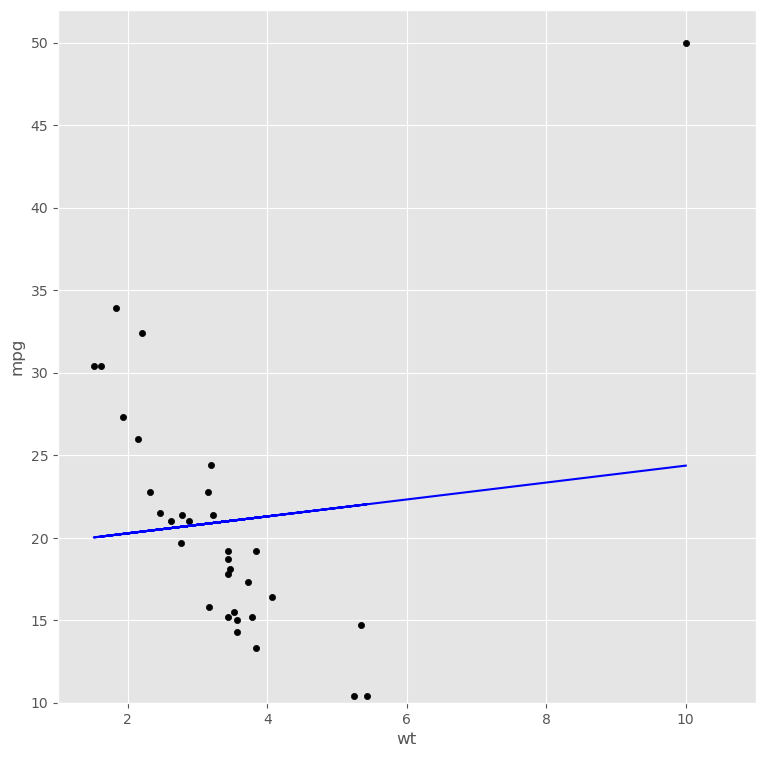

In [24]:
new_cars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black", xlim=(1,11), ylim=(10,52))

# Plot regression line
plt.plot(new_cars["wt"],     # Explanatory variable
         train_prediction2,  # Predicted values
         color="blue");

## Q-Q Plot

Check that the residuals are roughly normally distributed, with even spread above and below and homoscedastic.

((array([-2.02511189, -1.62590278, -1.38593914, -1.20666642, -1.05953591,
         -0.93235918, -0.81872017, -0.71478609, -0.6180591 , -0.52680137,
         -0.43973827, -0.35589149, -0.27447843, -0.19484777, -0.11643566,
         -0.03873405,  0.03873405,  0.11643566,  0.19484777,  0.27447843,
          0.35589149,  0.43973827,  0.52680137,  0.6180591 ,  0.71478609,
          0.81872017,  0.93235918,  1.05953591,  1.20666642,  1.38593914,
          1.62590278,  2.02511189]),
  array([-4.54315128, -3.90536265, -3.72686632, -3.46235533, -3.20536265,
         -2.97258623, -2.78093991, -2.61100374, -2.28261065, -2.08595212,
         -1.88302362, -1.10014396, -1.0274952 , -0.9197704 , -0.69325453,
         -0.20014396, -0.0502472 ,  0.152043  ,  0.29985604,  0.35642633,
          0.86687313,  1.17334959,  1.20105932,  1.29734994,  1.74619542,
          2.10328764,  2.34995929,  2.46436703,  4.16373815,  5.98107439,
          6.42197917,  6.87271129])),
 (3.0327797489458974, -3.300184035858

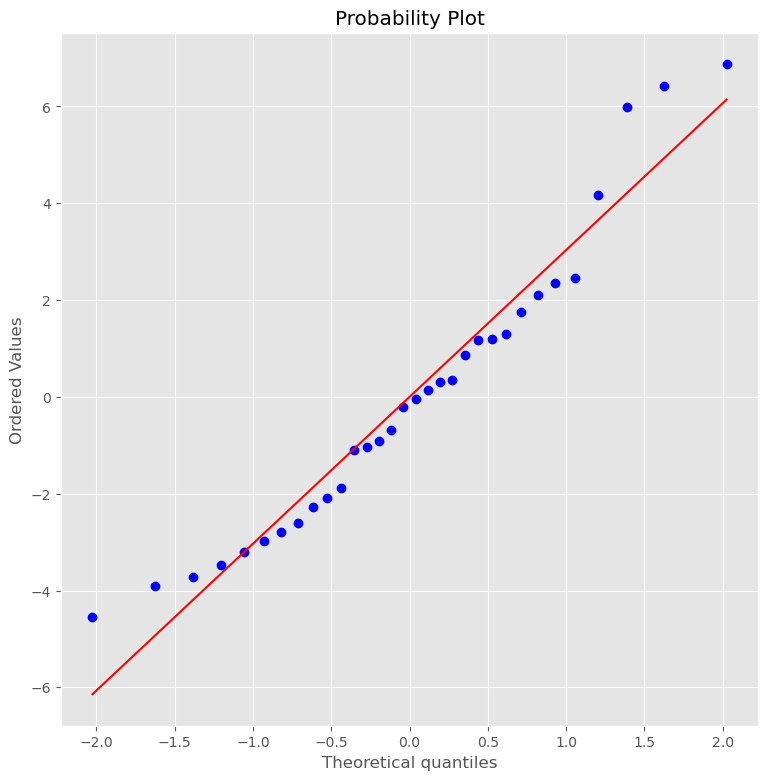

In [25]:
plt.figure(figsize=(9,9))
stats.probplot(residuals, dist='norm', plot=plt)

The variation at the extremes should be investigated.

## Root mean squared error

In [26]:
def rmse(predicted, targets):
    return np.sqrt(np.mean((targets-predicted)**2))

rmse(train_prediction, mtcars['mpg'])

2.949162685955028

Or, with sklearn

In [28]:
from sklearn.metrics import mean_squared_error

RMSE = mean_squared_error(train_prediction, mtcars["mpg"])**0.5

RMSE

2.949162685955028

## Polynomial Regression

Adding extra degress of the same variable.

In [30]:
poly_model = linear_model.LinearRegression()

predictors = pd.DataFrame([mtcars['wt'],
                           mtcars['wt']**2]).T


poly_model.fit(X=predictors, y=mtcars['mpg'])

print(f'{poly_model.intercept_=}')
print(f'{poly_model.coef_=}')
print(f'Model Accuracy: {poly_model.score(X=predictors, y=mtcars["mpg"])}')

poly_model.intercept_=49.93081094945181
poly_model.coef_=array([-13.38033708,   1.17108689])
Model Accuracy: 0.8190613581384095


/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


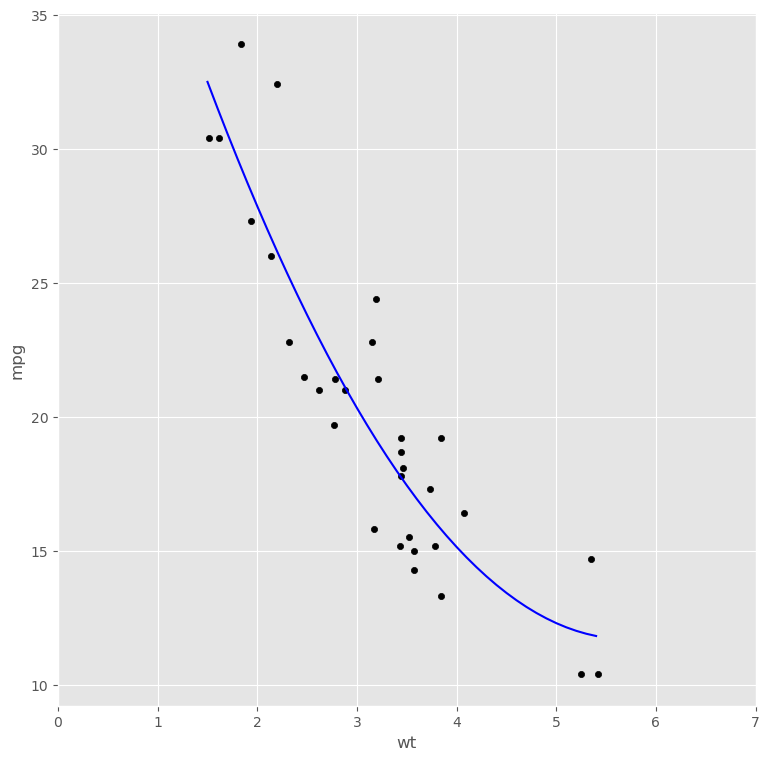

In [31]:
# Plot the curve from 1.5 to 5.5
poly_line_range = np.arange(1.5, 5.5, 0.1)

# Get first and second order predictors from range
poly_predictors = pd.DataFrame([poly_line_range,
                               poly_line_range**2]).T

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(poly_line_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

In [32]:
preds = poly_model.predict(X=predictors)
rmse(preds, mtcars['mpg'])

2.5233004724610786

**Pay attention to over-fitting** - don't use too many variables.

In [33]:
# Initialize model
poly_model = linear_model.LinearRegression()

# Make a DataFrame of predictor variables
predictors = pd.DataFrame([mtcars["wt"],           
                           mtcars["wt"]**2,
                           mtcars["wt"]**3,
                           mtcars["wt"]**4,
                           mtcars["wt"]**5,
                           mtcars["wt"]**6,
                           mtcars["wt"]**7,
                           mtcars["wt"]**8,
                           mtcars["wt"]**9,
                           mtcars["wt"]**10]).T     

# Train the model using the new_cars data
poly_model.fit(X = predictors, 
               y = mtcars["mpg"])

# Check trained model y-intercept
print("Model intercept")
print(poly_model.intercept_)

# Check trained model coefficients (scaling factor given to "wt")
print("Model Coefficients")
print(poly_model.coef_)

# Check R-squared
poly_model.score(X = predictors, 
                 y = mtcars["mpg"])

Model intercept
-14921.121839436888
Model Coefficients
[ 6.45813609e+04 -1.20086138e+05  1.26931934e+05 -8.46598487e+04
  3.73155211e+04 -1.10334759e+04  2.16590410e+03 -2.70730551e+02
  1.94974166e+01 -6.15515449e-01]


0.8702106556306889

/home/biscotty/.config/anaconda3/envs/data/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


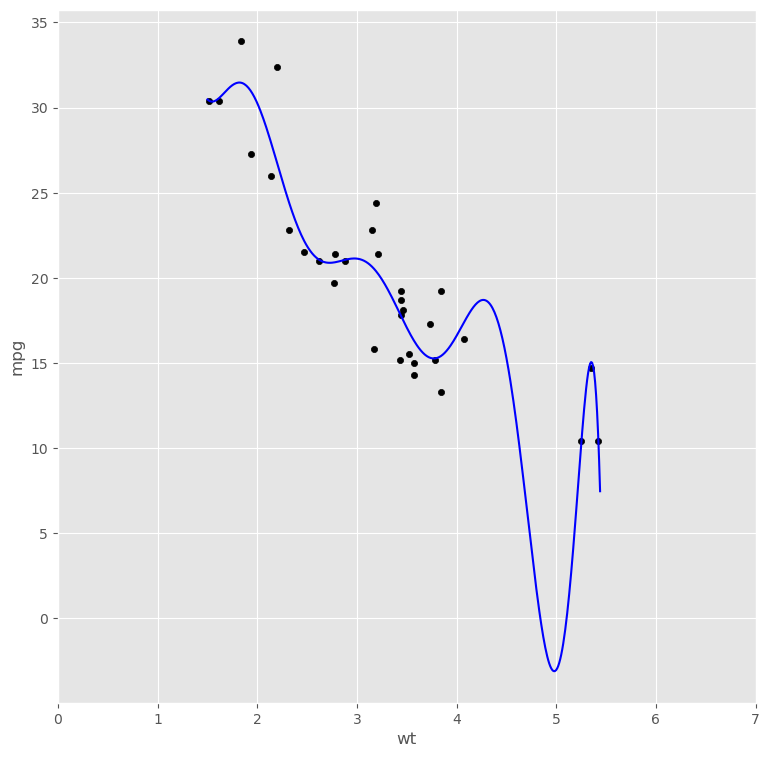

In [34]:
p_range = np.arange(1.5, 5.45, 0.01)

poly_predictors = pd.DataFrame([p_range, p_range**2, p_range**3,
                              p_range**4, p_range**5, p_range**6, p_range**7, 
                              p_range**8, p_range**9, p_range**10]).T  

# Get corresponding y values from the model
y_values = poly_model.predict(X = poly_predictors)

mtcars.plot(kind="scatter",
           x="wt",
           y="mpg",
           figsize=(9,9),
           color="black",
           xlim = (0,7))

# Plot curve line
plt.plot(p_range,   # X-axis range
         y_values,          # Predicted values
         color="blue");

## Multiple Linear Regression

More than one variable

In [35]:
multi_reg_model = linear_model.LinearRegression()

multi_reg_model.fit(X=mtcars.loc[:,['wt','hp']],
                    y=mtcars['mpg'])

print(multi_reg_model.intercept_)
print(multi_reg_model.coef_)
multi_reg_model.score(X=mtcars.loc[:,["wt","hp"]],
                      y=mtcars['mpg'])

37.22727011644721
[-3.87783074 -0.03177295]


0.8267854518827915

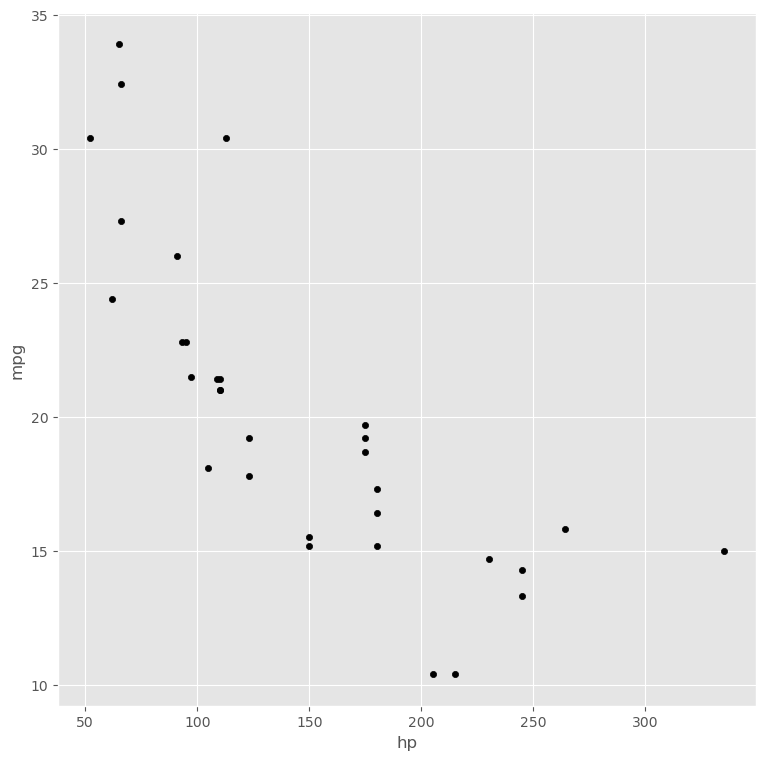

In [36]:
mtcars.plot(kind="scatter",
           x="hp",
           y="mpg",
           figsize=(9,9),
           color="black");

In [44]:
# Initialize model
multi_reg_model = linear_model.LinearRegression()

# Include squared terms
poly_predictors = pd.DataFrame([mtcars["wt"],
                                mtcars["hp"],
                                mtcars["wt"]**2,
                                mtcars["hp"]**2]).T

# Train the model using the mtcars data
multi_reg_model.fit(X = poly_predictors, 
                    y = mtcars["mpg"])

# Check R-squared
print("R-Squared")
print( multi_reg_model.score(X = poly_predictors , 
                      y = mtcars["mpg"]) )

# Check RMSE
print("RMSE")
print(rmse(multi_reg_model.predict(poly_predictors),mtcars["mpg"]))

R-Squared
0.8907279549670641
RMSE
1.9609108134176987


High R-squared and low RMSE suggests a good fit. Should split data into train/test.